Front Page

# Report Index 📊

1. **Executive Summary** 📝  
   _Key findings and recommendations._


2. **Dataset Overview** 📋  
   _Summary of data sources, time period, and key variables._


3. **Introduction to Exploratory Data Analysis (EDA)** 🔍  
   _Key steps of the EDA process._


4. **SWOT Analysis** 🧠  
   _Analysis of **Strengths**, **Weaknesses**, **Opportunities**, and **Threats** based on insights from EDA._


5. **Recommendations** 💡  
   _Actionable recommendations for business improvement based on EDA and SWOT analysis._


6. **Next Steps** 🚀  
   _Suggested actions for deeper analysis to explore emerging opportunities._

Executive Summary

### Dataset Overview

The dataset used for this analysis contains **sales transactions** and related **customer**, **geography**, and **product details** from **2014 to 2017**, with a total of **9,994 records**.  

Key variables include:

- **Profit**, **Sales** and **Discount**: Financial metrics.
- **Product Category**, **Sub-Category** and **Product Name**: Classification of products.
- **Customer Segment** and **Customer Name**: Customer types.
- **Geographical Data**: Information on **Region**, **State**, **City**, and **Postal Code**.
- **Order and Transaction Information**: Includes **Order ID**, **Order Date** and **Quantity** sold.

This dataset provides a comprehensive view of the company's operations over a four-year period, enabling the analysis of various factors that influence profitability, product mix and regional performance.

### Exploratory Data Analysis (EDA) Overview

In this report, we present the findings of an in-depth Exploratory Data Analysis (EDA) performed on the dataset using Python. The primary goal of this analysis is to uncover valuable insights regarding the factors influencing profitability, while identifying areas for potential improvement and growth.  

The main steps included:

- **Data Quality Assessment and Cleaning**: Established a solid foundation for analysis by identifying and resolving data inconsistencies.  

- **New Metrics Creation**: Calculated key financial metrics like **List Price**, **Net Price**, **COGS**, and **Gross Margin**, to provide deeper insights.  

- **Descriptive Statistics & Correlation**: Analyzed **Profit** distribution and correlations with numerical variables to identify **key drivers** of profitability.  

- **Categorical Analysis**: Explored relationships between **Profit** and dimensions like **Customer**, **Product** and **Geography**, including annual trends.  

- **Hypothesis Testing**: Assessed regional **pricing and discount strategies** to identify significant variations across states.  

- **Profit Classification & Clustering**: Classified **Profit** levels (Low, Medium, High) and used dimensionality reduction and **clustering algorithm** to identify clusters within low-profit segment.  

These findings provide a deeper understanding of the company's strengths and challenges, which we will now explore through a **SWOT analysis**.

### SWOT Analysis
  
  
  
<img src="https://github.com/Kristinawk/final_project_ETL_Analytics/blob/main/notebooks/support_doc/swot2.PNG?raw=true" width=1200 align="Left">

In [39]:
# Imports

import pandas as pd
import numpy as np

import scipy.stats as stats
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles

import seaborn as sns
import matplotlib.pylab as plt
from matplotlib.ticker import FuncFormatter

import umap
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

import textwrap

pd.set_option('display.max_columns', None)

In [40]:
# Pre-processed dataset

df = pd.read_csv('../data/Superstore_250307.csv')

In [41]:
# Profit distribution

per_05 = df['Profit'].quantile(0.05)
per_95 = df['Profit'].quantile(0.95)

print(f'90% of Profit distribution is between {int(per_05)} and {int(per_95)} dollars')

90% of Profit distribution is between -53 and 168 dollars


In [42]:
# Profit Histogram

plt.ioff()

data = df['Profit']

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 5))
ax = data.plot.hist(bins=15, range=(per_05, per_95))
ax.set_xlabel('Profit')
ax.set_title('Histogram of Profit per order item*')

# Add footnote
plt.text(0.35, -0.1, '(*) Profit data excludes extreme outliers.', 
         ha='right', va='top', transform=ax.transAxes, fontsize=10, color='gray')

Text(0.35, -0.1, '(*) Profit data excludes extreme outliers.')

### Introduction to SWOT

The Exploratory Data Analysis was performed to identify key drivers and trends in profit.

💰 **Profit Statistics**
- The average profit per order item is **28,66 \$**, with a standard deviation of **234,26 \$**.
- **90%** of item profits fall within the range of **-53 \$** **to 168 \$**.
- However, there are a few outliers, with profits ranging from **-6.600 \$** **to 8.400 \$**.

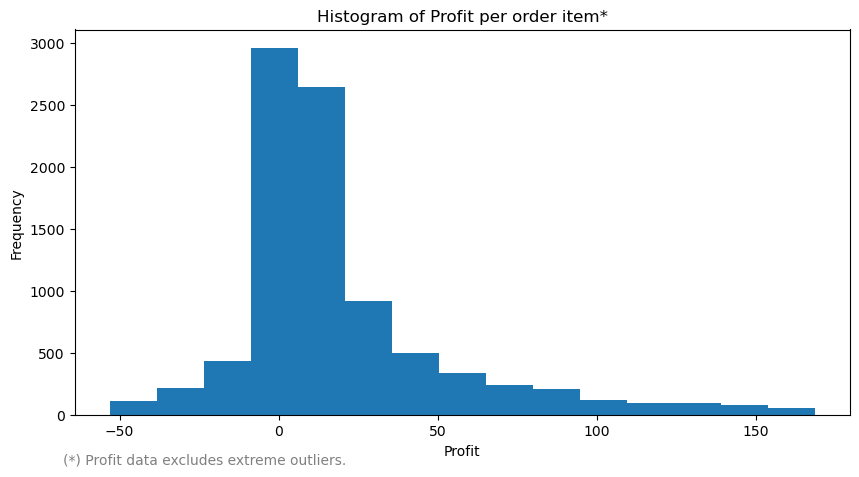

In [43]:
plt.ion()
plt.show()

In [44]:
# Share of items with negative profit

# Create two sub-sets
profit_neg = df[df['Profit'] < 0 ]
profit_pos = df[df['Profit'] >= 0 ]

# Group by year
profit_neg = profit_neg.groupby('Order Year')['Row ID'].count().reset_index(name='Negative Profit')
profit_pos = profit_pos.groupby('Order Year')['Row ID'].count().reset_index(name='Positive Profit')

# Calculate the share of items with negative profit
result = pd.merge(profit_neg, profit_pos, on='Order Year')
result['Negative profit share'] = (result['Negative Profit'] / (result['Negative Profit'] + result['Positive Profit']))

result.drop(['Negative Profit', 'Positive Profit'], axis=1, inplace=True)

In [45]:
# Profit annual trend

profit_yr = df.groupby('Order Year')['Profit'].sum().reset_index(name='Total Profit')

data = pd.merge(result, profit_yr, on='Order Year')

In [46]:
# Profit evolution bar-chart

plt.ioff()

# Create figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the bar chart for Total Profit on the primary y-axis
ax1.bar(data['Order Year'], data['Total Profit'], color='tab:blue', label='Total Profit')
ax1.set_xlabel('Order Year')
ax1.set_ylabel('Total Profit')
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x / 1000:.0f}k')) # set format to thousands
ax1.set_xticks(data['Order Year'].unique())

# Create secondary y-axis
ax2 = ax1.twinx()
# Plot the line chart for Negative Profit Share on the secondary y-axis
ax2.plot(data['Order Year'], data['Negative profit share'], color='tab:red', marker='o', label='Negative Profit Share')
ax2.set_ylabel('Items share with (-) Profit')
ax2.set_ylim(0, 0.50)
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y*100:.0f}%')) # set format to percentage

# Set title
plt.title('Total Profit & Negative Profit Share by Year')

# Show the legend
fig.tight_layout()  # Adjust layout to make room for both y-axes
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

### Introduction to SWOT

📈 **Profit Annual Trend**

The total profit exhibits a **positive annual trend**, while the proportion of order items with negative profit remains consistently stable at **18%**.

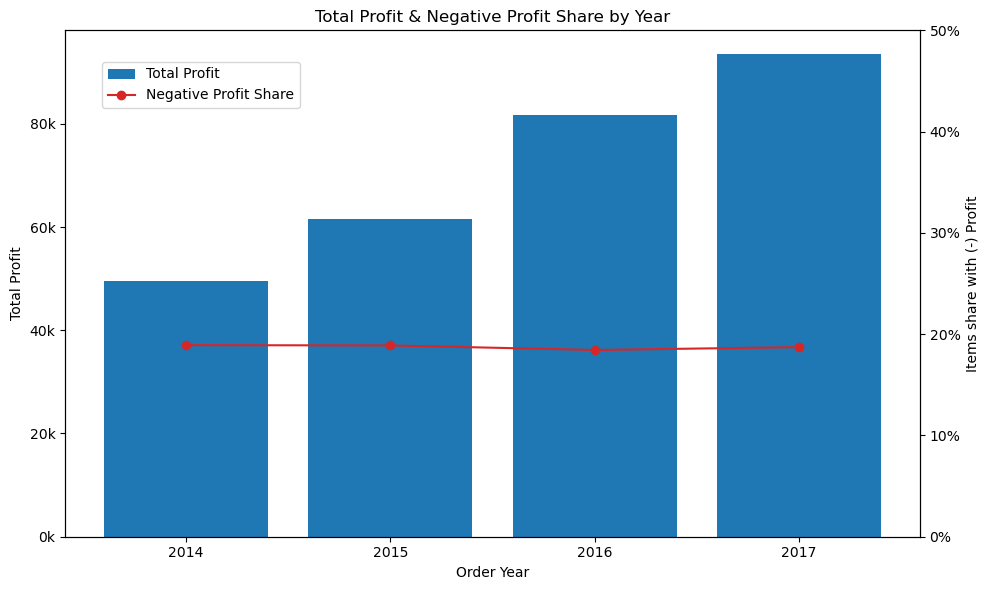

In [47]:
plt.ion()
plt.show()

In [48]:
# Correlation matrix

# Define numerical variables
num_vars_hm = [
    'Profit',
    'COGS',
    'List Price',
    'Net Price',
    'Discount',
    'Quantity',
    'Sales',
    'Gross Margin',
    'Shipping Days',
    'Order Month']

In [101]:
# Heatmap

plt.ioff()

# Define dataframe with numerical variables
df_num_vars_hm = df[num_vars_hm]

# Create figure and axis
fig, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(df_num_vars_hm.corr(),
                 vmin=-1,
                 vmax=1,
                 cmap=sns.diverging_palette(20, 220, as_cmap=True),
                 annot=True,
                 fmt=".2f",
                 ax=ax)

# Set title
plt.title('Correlation Matrix')

# Adjust layout
plt.tight_layout()

### Introduction to SWOT

🔧 **Profit Levers**

The analysis reveals several important insights into the supermarket's profit drivers:

1. **Profit Drivers**: **List Price**, **Net Price**, and **Sales** are the most influential factors with a **positive impact** on **Profit**. 
2. **Discounts**: Discounts not only fail to boost sales volume but also have a **very negative impact** on **Gross Profit**, suggesting that the current discount strategy significantly reduces overall profitability.
3. **Quantity**: Quantity shows a low correlation with **Profit**, likely due to the absence of correlation between **Quantity** and **Price**. This behavior may indicate potential anomalies in the dataset, which was flagged during the preliminary ETL process.
4. **Shipping Days & Order Month**: Neither Shipping Days nor the Order Month appear to have any meaningful impact on **Profit**, suggesting they do not significantly influence sales or profitability in this dataset.

💡 These findings emphasize the need for a reevaluation of the supermarket's discount strategy, while highlighting the importance of optimizing pricing and sales practices for better profitability.

In [103]:
### Introduction to SWOT

# 🔧 Profit Levers

plt.ion()
plt.show()

In [104]:
# Numeric Variables, evolution over time:

# Create a copy of original dataframe and add Discount Value for calculations:
df_year = df.copy()
df_year['Discount Value'] = df_year['Discount'] * df_year['List Price'] * df_year['Quantity']

# Group data by year
df_year_grouped = df_year.groupby('Order Year')[['Profit', 'Sales', 'List Price', 'Net Price', 'Discount', 'Gross Margin', 'Quantity', 'Discount Value']].sum()

# Re-calculate relative metrics
df_year_grouped['List Price'] = (df_year_grouped['Sales'] + df_year_grouped['Discount Value']) / df_year_grouped['Quantity']
df_year_grouped['Net Price'] = df_year_grouped['Sales'] / df_year_grouped['Quantity']
df_year_grouped['Discount'] = 1 - (df_year_grouped['Net Price'] / df_year_grouped['List Price'])
df_year_grouped['Gross Margin'] = df_year_grouped['Profit'] / df_year_grouped['Sales']

# Reset index
df_year_grouped.reset_index(inplace=True)

In [105]:
# Annual trend line-charts

plt.ioff()

# Create the subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot 'Profit' and 'Sales' on the first subplot
axes[0].plot(df_year_grouped['Order Year'], df_year_grouped['Profit'], label='Profit', color='tab:blue')
axes[0].plot(df_year_grouped['Order Year'], df_year_grouped['Sales'], label='Sales', color='tab:orange')
axes[0].set_title('Profit and Sales by Order Year')
axes[0].set_xlabel('Order Year')
axes[0].set_ylabel('Amount')
axes[0].legend()
axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x / 1000:.0f}k')) # set format to thousands
axes[0].set_xticks(data['Order Year'].unique())

# Plot 'List Price' and 'Net Price' on the second subplot
axes[1].plot(df_year_grouped['Order Year'], df_year_grouped['List Price'], label='List Price', color='tab:green')
axes[1].plot(df_year_grouped['Order Year'], df_year_grouped['Net Price'], label='Net Price', color='tab:red')
axes[1].set_title('List Price and Net Price by Order Year')
axes[1].set_xlabel('Order Year')
axes[1].set_ylabel('Price')
axes[1].legend()
axes[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.2f}')) # set format to two decimal places
axes[1].set_xticks(data['Order Year'].unique())

# Plot 'Discount' and 'Gross Margin' on the third subplot
axes[2].plot(df_year_grouped['Order Year'], df_year_grouped['Discount'], label='Discount', color='tab:purple')
axes[2].plot(df_year_grouped['Order Year'], df_year_grouped['Gross Margin'], label='Gross Margin', color='tab:brown')
axes[2].set_title('Discount and Gross Margin by Order Year')
axes[2].set_xlabel('Order Year')
axes[2].set_ylabel('Percentage')
axes[2].legend()
axes[2].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y*100:.0f}%')) # set format to percentage
axes[2].set_xticks(data['Order Year'].unique())

# Adjust layout to prevent overlapping labels
plt.tight_layout()

### Introduction to SWOT

📈 **Profit Levers: annual trend**

**Net Price** and **List Price** exhibit yearly fluctuations, with declines in 2015 and 2017. **Gross Margin** follows an inverse trend to **Discounts**, reaffirming the negative impact of discounts on margin.

🏆 **Sales** and **Profit** show a consistent positive trend from 2014 to 2017.  
⚠️ Despite the increase in **Total Profit** in 2017, the key concern is the decline in **Gross Margin** due to higher discounts.

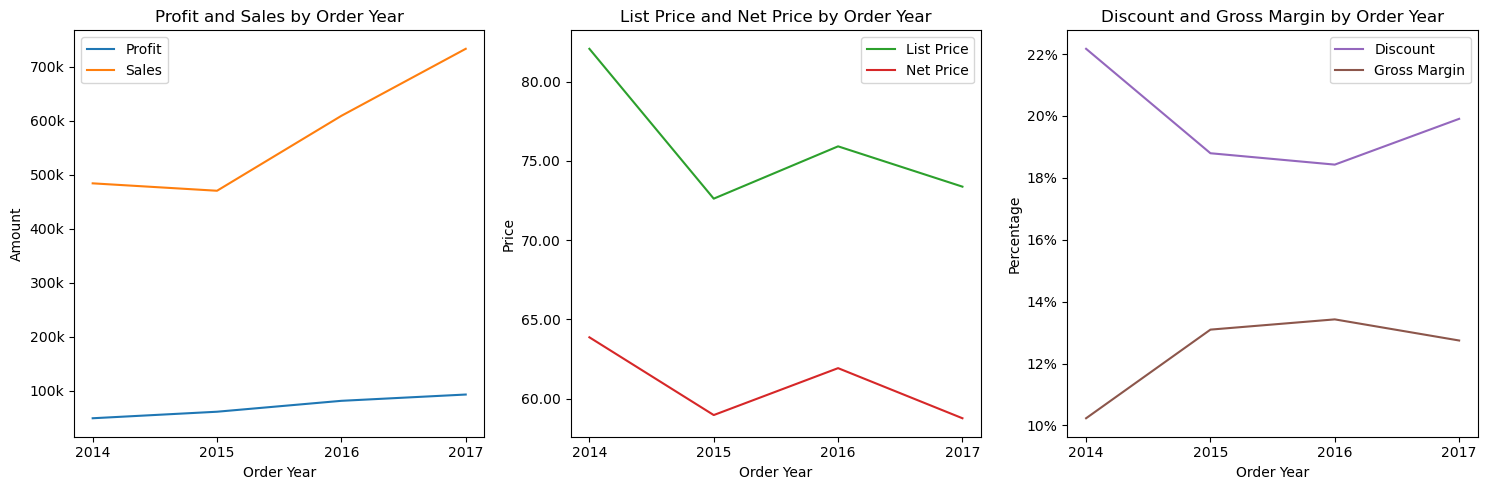

In [69]:
plt.ion()
plt.show()

In [80]:
# Profit vs Sales and Discounts, scatter plots

plt.ioff()

# Create figure and axes for two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot - Profit vs Sales (left plot)
sns.scatterplot(data=df, y='Profit', x='Sales', size='Discount',
                sizes=(20, 120), edgecolor='black', linewidth=0.4, alpha=0.7, ax=axes[0])

# Update title and axis labels for the left plot
axes[0].set_title('Scatter plot of Profit vs Sales')
axes[0].set_xlabel('Sales')
axes[0].set_ylabel('Profit')
axes[0].grid(True, linestyle='--', alpha=0.5)
axes[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x / 1000:.0f}k')) # set format to thousands
axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x / 1000:.0f}k')) # set format to thousands

# Scatter plot - Profit vs Discount (right plot)
sns.scatterplot(data=df, y='Profit', x='Discount', size='Sales',
                sizes=(20, 120), edgecolor='black', linewidth=0.4, alpha=0.7, ax=axes[1])

# Update title and axis labels for the right plot
axes[1].set_title('Scatter plot of Profit vs Discount')
axes[1].set_xlabel('Discount')
axes[1].set_ylabel('Profit')
axes[1].grid(True, linestyle='--', alpha=0.5)
axes[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y*100:.0f}%')) # set format to percentage
axes[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x / 1000:.0f}k')) # set format to thousands

# Adjust layout to prevent overlap
plt.tight_layout()

### Introduction to SWOT

🔍 **Discounts deep-dive**

💡 There is a linear relationship between **Sales** and **Profit**. At lower discount levels, higher sales drive higher profit, but as discounts surpass **40%**, the impact becomes negative, with profit decreasing as discounts increase.

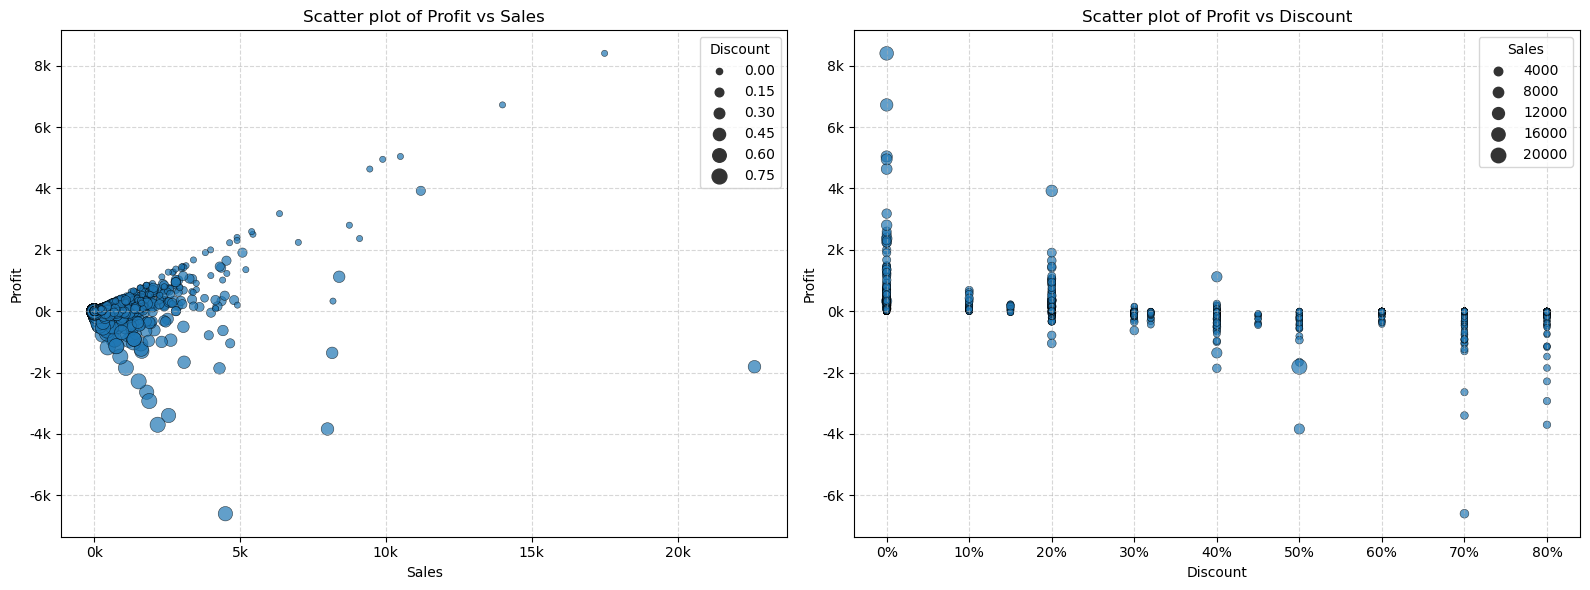

In [81]:
plt.ion()
plt.show()

In [86]:
# Discount plot KDE

plt.ioff()

# Create figure and axis
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x='Discount', label='Discount', fill=True)

# Update title and axis
plt.title('KDE plot of Discounts and Sales')
plt.xlabel('Discount')
plt.xticks(np.arange(0, 1, step=0.1))
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y*100:.0f}%'))
plt.ylabel('Density')

# Adjust layout
plt.tight_layout()

### Introduction to SWOT

🔍 **Discounts deep-dive**

💡 The density chart illustrates that the majority of order items are associated with discounts of **0%** and **20%**, highlighting the most frequent discount levels in the dataset.

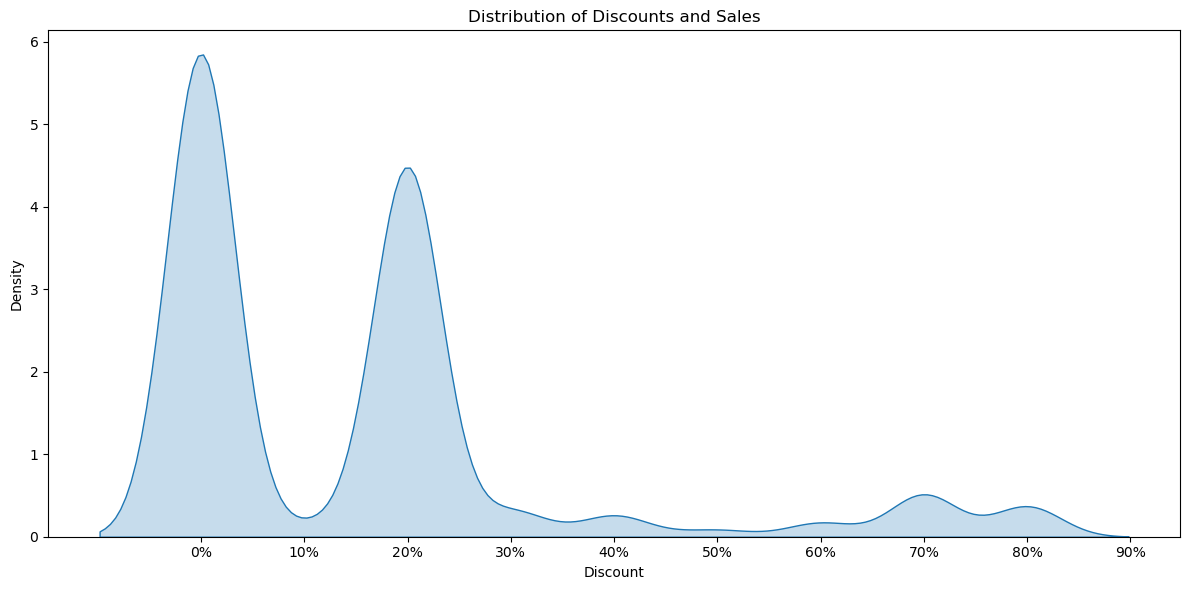

In [87]:
plt.ion()
plt.show()

### Introduction to SWOT

🔍 **Profit by Customer Segment**

💡 The density chart illustrates that the majority of order items are associated with discounts of **0%** and **20%**, highlighting the most frequent discount levels in the dataset.

In [120]:
# Customer Segment

# Create a copy of original dataframe and add Discount Value for calculations:
df_segment = df.copy()
df_segment['Discount Value'] = df_segment['Discount'] * df_segment['List Price'] * df_segment['Quantity']

# Group data by Segment
df_segment_grouped = df_segment.groupby('Segment')[['Profit', 'Sales', 'List Price', 'Net Price', 'Discount', 'Gross Margin', 'Quantity', 'Discount Value']].sum()

# Re-calculate relative metrics
df_segment_grouped['List Price'] = (df_segment_grouped['Sales'] + df_segment_grouped['Discount Value']) / df_segment_grouped['Quantity']
df_segment_grouped['Net Price'] = df_segment_grouped['Sales'] / df_segment_grouped['Quantity']
df_segment_grouped['Discount'] = 1 - (df_segment_grouped['Net Price'] / df_segment_grouped['List Price'])
df_segment_grouped['Gross Margin'] = df_segment_grouped['Profit'] / df_segment_grouped['Sales']

# Reset index
df_segment_grouped.reset_index(inplace=True)

# Drop Discount Value
df_segment_grouped.drop(['Discount Value'], axis=1, inplace=True)

# Sort by Profit
df_segment_grouped.sort_values(by='Profit', inplace=True)

# Reorder the columns 
new_column_order = ['Segment', 'List Price', 'Net Price', 'Discount', 'Quantity', 'Sales', 'Profit', 'Gross Margin']
df_segment_grouped = df_segment_grouped[new_column_order]
'''
import math

col_lst = [col for col in new_column_order if col != 'Segment']

for col in col_lst:
        
        df_segment_grouped[col] = pd.to_numeric(df_segment_grouped[col], errors='coerce')
        df_segment_grouped[col] = df_segment_grouped[col].apply(
                        lambda x: math.ceil(x * 100) / 100 if pd.notna(x) and np.isfinite(x) else x)
       
# Apply custom format
df_segment_grouped['Profit'] = df_segment_grouped['Profit'].apply(lambda x: f'{x:,.0f}')
df_segment_grouped['Sales'] = df_segment_grouped['Sales'].apply(lambda x: f'{x:,.0f}')
df_segment_grouped['List Price'] = df_segment_grouped['List Price'].apply(lambda x: f'{x:.2f}')
df_segment_grouped['Net Price'] = df_segment_grouped['Net Price'].apply(lambda x: f'{x:.2f}')
df_segment_grouped['Discount'] = df_segment_grouped['Discount'].apply(lambda x: f'{x*100:.2f}%')
df_segment_grouped['Gross Margin'] = df_segment_grouped['Gross Margin'].apply(lambda x: f'{x*100:.2f}%')
df_segment_grouped['Quantity'] = df_segment_grouped['Quantity'].apply(lambda x: f'{x:,.0f}')
'''
df_segment_grouped.style.format({
    'Profit': '{:,.0f}',
    'Sales': '{:,.0f}',
    'List Price': '{:.2f}',
    'Net Price': '{:.2f}',
    'Discount': '{:.2f}%',
    'Gross Margin': '{:.2f}%',
    'Quantity': '{:,.0f}'
})

df_segment_grouped


ImportError: Can't determine version for jinja2

In [118]:
# Profit by Customer Segment, pie chart

# Create figure and axis
plt.figure(figsize=(3, 3))
plt.pie(df_segment_grouped['Profit'], labels=df_segment_grouped['Segment'], autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})

# Update title and axis
plt.axis('equal')
plt.title('Pie Chart Profit by Segment')

# Adjust layout
plt.tight_layout()

plt.show()

ValueError: could not convert string to float: '60,299'

In [ ]:
# Numeric Variables, evolution over time:

# Create a copy of original dataframe and add Discount Value for calculations:
df_year = df.copy()
df_year['Discount Value'] = df_year['Discount'] * df_year['List Price'] * df_year['Quantity']

# Group data by year
df_year_grouped = df_year.groupby('Order Year')[['Profit', 'Sales', 'List Price', 'Net Price', 'Discount', 'Gross Margin', 'Quantity', 'Discount Value']].sum()

# Re-calculate relative metrics
df_year_grouped['List Price'] = (df_year_grouped['Sales'] + df_year_grouped['Discount Value']) / df_year_grouped['Quantity']
df_year_grouped['Net Price'] = df_year_grouped['Sales'] / df_year_grouped['Quantity']
df_year_grouped['Discount'] = 1 - (df_year_grouped['Net Price'] / df_year_grouped['List Price'])
df_year_grouped['Gross Margin'] = df_year_grouped['Profit'] / df_year_grouped['Sales']

# Reset index
df_year_grouped.reset_index(inplace=True)

**INSIGHTS:** Consumer segment delivers the biggest share of Profit, but it also has the lowest Gross Margin.

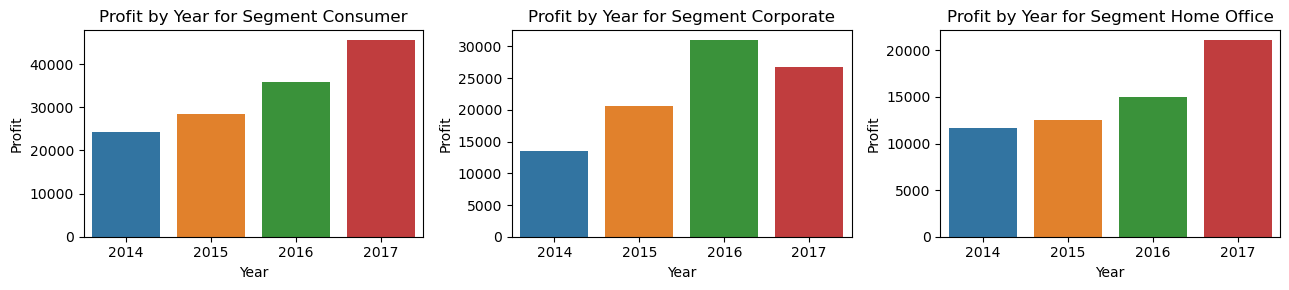

In [99]:
# Segment evolution by year:

eval_feature = 'Profit'

df_segment_year = df.groupby(['Segment', 'Order Year'])[eval_feature].sum().reset_index()

segments = df_segment_year['Segment'].unique()

# Create subplots (one for each segment)
fig, axes = plt.subplots(nrows=1, ncols=len(segments), figsize=(13, 3))

# Loop through each segment and plot its respective bar chart
for ax, segment in zip(axes, segments):

    segment_data = df_segment_year[df_segment_year['Segment'] == segment]
    
    sns.barplot(data=segment_data, x='Order Year', y=eval_feature, ax=ax)
    
    ax.set_title(f'{eval_feature} by Year for Segment {segment}')
    ax.set_xlabel('Year')
    ax.set_ylabel(eval_feature)

plt.tight_layout()

Conclusion: Profit increased in all segments year over year, except for Corporate, where total profit decreased in 2017.

**To does:** see why?

In [ ]:
# Product Category

df_category = df.groupby('Category').agg(
    profit_sum=('Profit', 'sum'),
    profit_mean=('Profit', 'mean'),
    discount_mean=('Discount', 'mean'),
    sales_sum=('Sales', 'sum'),
    quantity_sum=('Quantity', 'sum'),
).reset_index()

df_category['profit_sum'] = df_category['profit_sum']/1000
df_category['sales_sum'] = df_category['sales_sum']/1000
df_category['quantity_sum'] = df_category['quantity_sum']/1000
df_category['gross_margin'] = df_category['profit_sum'] / df_category['sales_sum']
    
df_category

In [ ]:
num_vars = list(df.describe().columns)
cat_vars = [col for col in df.columns if col not in num_vars]

In [ ]:
plt.figure(figsize=(3, 3))

plt.pie(df_category['profit_sum'], labels=df_category['Category'], autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})

plt.axis('equal')
plt.title('Pie Chart Profit by Category')
plt.tight_layout()

**INSIGHTS:**
- The most profitable product category is Technology. With Gross Margin of 17.4%, it represents half of the total Profit
- Furniture has very low Gross Margin (only 2.5%). This is something to improve.

**To does:** analyse why GM for Furniture is so low

In [ ]:
df_num_vars = df[num_vars]

In [ ]:
# Category evolution by year:

eval_feature = 'Profit'

df_category_year = df.groupby(['Category', 'Order Year'])[eval_feature].sum().reset_index()

categories = df_category_year['Category'].unique()

# Create subplots (one for each segment)
fig, axes = plt.subplots(nrows=1, ncols=len(categories), figsize=(13, 3))

# Loop through each segment and plot its respective bar chart
for ax, category in zip(axes, categories):

    category_data = df_category_year[df_category_year['Category'] == category]
    
    sns.barplot(data=category_data, x='Order Year', y=eval_feature, ax=ax)
    
    ax.set_title(f'{eval_feature} by Year for Category {category}')
    ax.set_xlabel('Year')
    ax.set_ylabel(eval_feature)

plt.tight_layout()

Conclusion: Office Suppliers and Technology grew year over year, but Furniture decreased significantly in 2015 and 2017. We need to analyse what was different in those years to identify the reason of profit loss.

In [ ]:
# Product Sub-Category

df_subcat = df.groupby(['Category', 'Sub-Category']).agg(
    profit_sum=('Profit', 'sum'),
    profit_mean=('Profit', 'mean'),
    discount_mean=('Discount', 'mean'),
    sales_sum=('Sales', 'sum'),
    quantity_sum=('Quantity', 'sum'),
).reset_index()

df_subcat['profit_sum'] = df_subcat['profit_sum']/1000
df_subcat['sales_sum'] = df_subcat['sales_sum']/1000
df_subcat['quantity_sum'] = df_subcat['quantity_sum']/1000
df_subcat['gross_margin'] = df_subcat['profit_sum'] / df_subcat['sales_sum']
    
df_subcat.sort_values(by='profit_sum')

**INSIGHTS**:
- Tables, Bookcases and Suppliers have negative profit.
- Machines, Storage and Chairs have Gross Margin <10%
- Tables, Bookcases, Machines and Binders have discount >20%

In [ ]:
# Sub-Category evolution by year:

eval_feature = 'Profit'

df_subcat_year = df.groupby(['Sub-Category', 'Order Year'])[eval_feature].sum().reset_index()

subcats = df_subcat_year['Sub-Category'].unique()

# Create subplots (one for each segment)
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(10, 13))

axes = axes.flatten()

# Loop through each segment and plot its respective bar chart
for i, (ax, subcat) in enumerate(zip(axes, subcats)):

    subcat_data = df_subcat_year[df_subcat_year['Sub-Category'] == subcat]
    
    sns.barplot(data=subcat_data, x='Order Year', y=eval_feature, ax=ax)
    
    ax.set_title(subcat)
    ax.set_xlabel('Year')
    ax.set_ylabel(eval_feature)
    
for j in range(i + 1, len(axes)):
    axes[j].axis('off')
        
plt.tight_layout()

### Introduction to SWOT

🔍 **Pricing and Discount Strategy by Geographic Areas**

💡 The density chart illustrates that the majority of order items are associated with discounts of **0%** and **20%**, highlighting the most frequent discount levels in the dataset.

Conclusion: 
- Tables always had negative profit, this might be due to a wrong price policy
- Bookcases only had positive profit in 2016 and then turned again negative
- Suppliers had positive profit in 2014 but the following years it turned negative
- Machines and Biners had negative profit only in 2017, this needs to be investigated

In [ ]:
# Products

df_prod = df.groupby(['Category', 'Sub-Category', 'Product PK', 'Product Name']).agg(
    profit_sum=('Profit', 'sum'),
    profit_mean=('Profit', 'mean'),
    discount_mean=('Discount', 'mean'),
    sales_sum=('Sales', 'sum'),
    quantity_sum=('Quantity', 'sum'),
).reset_index()

df_prod['profit_sum'] = df_prod['profit_sum']/1000
df_prod['sales_sum'] = df_prod['sales_sum']/1000
df_prod['quantity_sum'] = df_prod['quantity_sum']/1000
df_prod['gross_margin'] = df_prod['profit_sum'] / df_prod['sales_sum']

df_prod = df_prod.sort_values(by='profit_sum', ascending = False)

In [ ]:
# Top10 Products:

df_prod.head(10)

In [ ]:
top_prod_lst = list(df_prod.head(10)['Product PK'])
top_prod_lst

In [ ]:
# Top10 products evolution by year:

eval_feature = 'Profit'

df_top_prod = df[df['Product PK'].isin(top_prod_lst)]

top_prods = df_top_prod['Product Name'].unique()

df_top_prod_year = df_top_prod.groupby(['Product Name', 'Order Year'])[eval_feature].sum().reset_index()

# Create subplots (one for each segment)
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 10))

axes = axes.flatten()

# Loop through each segment and plot its respective bar chart
for i, (ax, top_prod) in enumerate(zip(axes, top_prods)):

    top_prod_data = df_top_prod_year[df_top_prod_year['Product Name'] == top_prod]
    
    sns.barplot(data=top_prod_data, x='Order Year', y=eval_feature, ax=ax)
    
    wrapped_title = textwrap.fill(top_prod, width=30)
    
    ax.set_title(wrapped_title, fontsize=10)
    ax.set_xlabel('Year')
    ax.set_ylabel(eval_feature)
    
for j in range(i + 1, len(axes)):
    axes[j].axis('off')
        
plt.tight_layout()

Conclusion: some products turned to negative Profit in the last year. We need to check Profit by Product by Year

In [ ]:
# Bottom10 Products:

df_prod.tail(10)

In [ ]:
bottom_prod_lst = list(df_prod.tail(10)['Product PK'])
bottom_prod_lst

In [ ]:
# Bottom10 products evolution by year:

eval_feature = 'Profit'

df_bottom_prod = df[df['Product PK'].isin(bottom_prod_lst)]

bottom_prods = df_bottom_prod['Product Name'].unique()

df_bottom_prod_year = df_bottom_prod.groupby(['Product Name', 'Order Year'])[eval_feature].sum().reset_index()

# Create subplots (one for each segment)
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 10))

axes = axes.flatten()

# Loop through each segment and plot its respective bar chart
for i, (ax, bottom_prod) in enumerate(zip(axes, bottom_prods)):

    bottom_prod_data = df_bottom_prod_year[df_bottom_prod_year['Product Name'] == bottom_prod]
    
    sns.barplot(data=bottom_prod_data, x='Order Year', y=eval_feature, ax=ax)
    
    wrapped_title = textwrap.fill(bottom_prod, width=30)
    
    ax.set_title(wrapped_title, fontsize=10)
    ax.set_xlabel('Year')
    ax.set_ylabel(eval_feature)
    
for j in range(i + 1, len(axes)):
    axes[j].axis('off')
        
plt.tight_layout()

Conclusion: all bottom products had negative profit at least two years in a row.

In [ ]:
# Customers

df_customer = df.groupby(['Segment', 'Customer Name', 'Order Year']).agg(
    profit_sum=('Profit', 'sum'),
    profit_mean=('Profit', 'mean'),
    discount_mean=('Discount', 'mean'),
    sales_sum=('Sales', 'sum'),
    quantity_sum=('Quantity', 'sum'),
).reset_index()

df_customer['profit_sum'] = df_customer['profit_sum']/1000
df_customer['sales_sum'] = df_customer['sales_sum']/1000
df_customer['quantity_sum'] = df_customer['quantity_sum']/1000
df_customer['gross_margin'] = df_customer['profit_sum'] / df_customer['sales_sum']

df_customer = df_customer.sort_values(by='profit_sum', ascending = False)

df_customer

In [ ]:
df_customer_17 = df_customer[(df_customer['Order Year'] == 2017) & (df_customer['profit_sum'] < 0)]

df_customer_17

**INSIGHTS:** In 2017 there are 146 customers that generated negative profit. A common pattern seems to be that they buy with higher discount.

In [ ]:
# Region

df_region = df.groupby('Region').agg(
    profit_sum=('Profit', 'sum'),
    profit_mean=('Profit', 'mean'),
    discount_mean=('Discount', 'mean'),
    sales_sum=('Sales', 'sum'),
    quantity_sum=('Quantity', 'sum'),
).reset_index()

df_region['profit_sum'] = df_region['profit_sum']/1000
df_region['sales_sum'] = df_region['sales_sum']/1000
df_region['quantity_sum'] = df_region['quantity_sum']/1000
df_region['gross_margin'] = df_region['profit_sum'] / df_region['sales_sum']
    
df_region

In [ ]:
plt.figure(figsize=(3, 3))

plt.pie(df_region['profit_sum'], labels=df_region['Region'], autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})

plt.axis('equal')
plt.title('Pie Chart Profit by Category')
plt.tight_layout()

**INSIGHTS:**
- West and East are the reginos with the highest profit in value and margin.
- Central region has the lowest Gross Margin

In [ ]:
# State

df_state = df.groupby(['Region', 'State']).agg(
    profit_sum=('Profit', 'sum'),
    profit_mean=('Profit', 'mean'),
    discount_mean=('Discount', 'mean'),
    sales_sum=('Sales', 'sum'),
    quantity_sum=('Quantity', 'sum'),
).reset_index()

df_state['profit_sum'] = df_state['profit_sum']/1000
df_state['sales_sum'] = df_state['sales_sum']/1000
df_state['quantity_sum'] = df_state['quantity_sum']/1000
df_state['gross_margin'] = df_state['profit_sum'] / df_state['sales_sum']
    
df_state = df_state.sort_values(by='profit_sum', ascending = False)

df_state

**INSIGTS**:
- There are 10 States where the business is not profitable. All of them with high discounts.
- California and New York are clearly the states with the bigguest business share (150 thousand dollars)

In [ ]:
# Profit by state and by region

regions = df['Region'].unique()

plt.figure(figsize=(15, 5))

for i, region in enumerate(regions, start=1):
    plt.subplot(1, 4, i)
    
    region_data = df[df['Region'] == region]
    
    profit_by_state = region_data.groupby('State')['Profit'].sum()
    
    profit_by_state.plot(kind='bar', color='skyblue')
    
    plt.title(f'Region: {region}')
    plt.xlabel('State')
    plt.ylabel('Profit')
    plt.xticks(rotation=45, ha='right')
    plt.ylim(top=80000, bottom=-20000)

plt.tight_layout()
plt.show()

In [ ]:
# Profit by state, by region and product category

grouped_data = df.groupby(['Region', 'State', 'Category'], as_index=False)['Profit'].sum()

pivot_data = grouped_data.pivot_table(index=['Region', 'State'], columns='Category', values='Profit', aggfunc='sum', fill_value=0)

plt.figure(figsize=(15, 6))

regions = pivot_data.index.get_level_values('Region').unique()
for i, region in enumerate(regions, start=1):
    plt.subplot(1, 4, i)

    region_data = pivot_data.xs(region, level='Region')

    region_data.plot(kind='bar', stacked=True, ax=plt.gca(), width=0.8)
    
    plt.title(f'Region: {region}')
    plt.xlabel('State')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=45, ha='right')
    plt.ylim(top=80000, bottom=-30000)

plt.tight_layout()
plt.show()

**INSIGHTS**:
- In central region, Texas and Illinois have negative profit. Only tech delivers positive profit. By contrary, Michigan has positive profit and there also Office Suppliers and Furniture provide positive profit.

- In the east, New York is clearly the best performer, especially selling Tech and Office Suppliers. On the other side, Ohio and Pennsylvania have negative profit in all product categories.

- In south of US, the highest profit comes from Georgia and Virginia, while Florida, North Carolina and Tennessee have negative profit in all product categories.

- In the West, California and Washington contribute the most to the overall profit. Although, Arizona and Colorado have negative profit in all product categories.

In [ ]:
# Hypotesys test:

# Hº = the mean of list price for Furniture is equal by state


furniture_df = df[df['Category'] == 'Furniture']

states = furniture_df['State'].unique()

price_by_state = [furniture_df[furniture_df['State'] == state]['List Price'] for state in states]

# Perform ANOVA test
f_stat, p_value = stats.f_oneway(*price_by_state)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

# Interpret the result
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: The mean 'List Price' is significantly different by State.")
else:
    print("Fail to reject the null hypothesis: The mean 'List Price' is not significantly different by State.")

In [ ]:
# Hypotesys test:

# Hº = the mean of discount for Furniture is equal by state


furniture_df = df[df['Category'] == 'Furniture']

states = furniture_df['State'].unique()

price_by_state = [furniture_df[furniture_df['State'] == state]['Discount'] for state in states]

# Perform ANOVA test
f_stat, p_value = stats.f_oneway(*price_by_state)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

# Interpret the result
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: The mean 'Discount' is significantly different by State.")
else:
    print("Fail to reject the null hypothesis: The mean 'Discount' is not significantly different by State.")

In [ ]:
# Hypotesys test:

# Hº = the mean of list price for Office Supplies is equal by state


furniture_df = df[df['Category'] == 'Office Supplies']

states = furniture_df['State'].unique()

price_by_state = [furniture_df[furniture_df['State'] == state]['List Price'] for state in states]

# Perform ANOVA test
f_stat, p_value = stats.f_oneway(*price_by_state)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

# Interpret the result
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: The mean 'List Price' is significantly different by State.")
else:
    print("Fail to reject the null hypothesis: The mean 'List Price' is not significantly different by State.")

In [ ]:
# Hypotesys test:

# Hº = the mean of discount for Office Supplies is equal by state


furniture_df = df[df['Category'] == 'Office Supplies']

states = furniture_df['State'].unique()

price_by_state = [furniture_df[furniture_df['State'] == state]['Discount'] for state in states]

# Perform ANOVA test
f_stat, p_value = stats.f_oneway(*price_by_state)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

# Interpret the result
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: The mean 'Discount' is significantly different by State.")
else:
    print("Fail to reject the null hypothesis: The mean 'Discount' is not significantly different by State.")

In [ ]:
# Hypotesys test:

# Hº = the mean of list price for Technology is equal by state


furniture_df = df[df['Category'] == 'Technology']

states = furniture_df['State'].unique()

price_by_state = [furniture_df[furniture_df['State'] == state]['List Price'] for state in states]

# Perform ANOVA test
f_stat, p_value = stats.f_oneway(*price_by_state)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

# Interpret the result
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: The mean 'List Price' is significantly different by State.")
else:
    print("Fail to reject the null hypothesis: The mean 'List Price' is not significantly different by State.")

In [ ]:
# Hypotesys test:

# Hº = the mean of discount for Technology is equal by state


furniture_df = df[df['Category'] == 'Technology']

states = furniture_df['State'].unique()

price_by_state = [furniture_df[furniture_df['State'] == state]['Discount'] for state in states]

# Perform ANOVA test
f_stat, p_value = stats.f_oneway(*price_by_state)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

# Interpret the result
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: The mean 'Discount' is significantly different by State.")
else:
    print("Fail to reject the null hypothesis: The mean 'Discount' is not significantly different by State.")

**INSIGHTS:**
- Furniture: both, list price and discount, are significantly different by state
- Office Supplies & Technology: the list price is similar by state, but discount policy is significantly different

### Clustering

In [ ]:
def levels(x):
    if x < 0:
        return 'Low'
    elif 0 <= x <= 28.66:
        return 'Medium'
    else:
        return 'High'

In [ ]:
df['Profit Level'] = df['Profit'].apply(lambda row: levels(row))
df.head()

In [ ]:
df_high = df[df['Profit Level'] == 'High']
df_medium = df[df['Profit Level'] == 'Medium']
df_low = df[df['Profit Level'] == 'Low']

print(f'Order items with high profit: {len(df_high)}')
print(f'Order items with medium profit: {len(df_medium)}')
print(f'Order items with low profit: {len(df_low)}')

#df_high = df_high.drop('Profit Level', axis=1)

#df_high

In [ ]:
# Scatter plot - Profit vs Sales by Profit Level:

plt.figure(figsize=(12, 10))
sns.scatterplot(data=df, y='Profit', x='Sales', hue='Profit Level', palette='Set1', size='Discount',
               sizes=(20, 120), edgecolor='black', linewidth=0.4, alpha=0.7)

plt.title('Scatter plot of Profit vs Sales')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.ylim(ymax=6000)
plt.xlim(xmax=12000)

plt.grid(True, linestyle='--', alpha=0.5) 

In [ ]:
# Plot KDE for Discount - High Profit

plt.figure(figsize=(8, 3))
sns.kdeplot(data=df_high, x='Discount', label='Discount', fill=True)

plt.title('Distribution of Discounts and Sales')
plt.xlabel('Discount %')
plt.xticks(np.arange(0, 1, step=0.1))
plt.ylabel('Density')
plt.legend()
plt.tight_layout()

In [ ]:
# Plot KDE for Discount - Medium Profit

plt.figure(figsize=(8, 3))
sns.kdeplot(data=df_medium, x='Discount', label='Discount', fill=True)

plt.title('Distribution of Discounts and Sales')
plt.xlabel('Discount %')
plt.xticks(np.arange(0, 1, step=0.1))
plt.ylabel('Density')
plt.legend()
plt.tight_layout()

In [ ]:
# Plot KDE for Discount - Low Profit

plt.figure(figsize=(8, 3))
sns.kdeplot(data=df_low, x='Discount', label='Discount', fill=True)

plt.title('Distribution of Discounts and Sales')
plt.xlabel('Discount %')
plt.xticks(np.arange(0, 1, step=0.1))
plt.ylabel('Density')
plt.legend()
plt.tight_layout()

**INSIGHTS**:
- For High and Medium Profit, the most frequent discount is 0% or 20%
- For Low or negative Profit, tere are two peacks in Discount Distribution: 10-50% and 50-90%

In [ ]:
# Distribution by state

# 1. Calculate the total profit by State
df_by_state = df.groupby(['State', 'City']).agg(
    Total_Profit=('Profit', 'sum'),
    Total_Orders=('Order ID', 'count'))

# 2. Calculate the probabilities of Profit Level by State
probabilities = df.groupby(['State', 'City'])['Profit Level'].value_counts(normalize=True).unstack(fill_value=0)
new_order = ['High', 'Medium', 'Low']
probabilities = probabilities[new_order]

# 3. Combine the total profit and probabilities into one DataFrame
result = pd.concat([df_by_state, probabilities], axis=1).sort_values(by=['State', 'Total_Orders'], ascending=[True, False])

result

In [ ]:
result_ncarolina = result.loc['North Carolina']

result_ncarolina

Conclusion: within the same State, Cities have different patterns in terms of profit.

### Machine learning

In [ ]:
import umap
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

#### Dimension reduction: UMAP

In [ ]:
df_umap = df_low[[x for x in df_low.columns if x != 'Profit']]
target = np.array(df_low['Profit'])

In [ ]:
# Label Encoding for categorical features

cat_vars = cat_vars + ['Profit Level']

label_encoder = LabelEncoder()

for col in cat_vars:
    df_umap.loc[:, col] = label_encoder.fit_transform(df_umap[col])
    
df_umap.head()

In [ ]:
# Scaling

scaler = StandardScaler()

df_scaled_umap = scaler.fit_transform(df_umap)

#df_scaled_umap

In [ ]:
# Train the reducer

reducer = umap.UMAP(random_state=42, 
                    n_neighbors=5, 
                    min_dist=0,
                    n_components=2,
                    metric='euclidean')
reducer.fit(df_scaled_umap)

In [ ]:
# Transform dataset into 2D shape

embedding = reducer.transform(df_scaled_umap)

embedding_df = pd.DataFrame(embedding)
embedding_df

#### Clustering: DBSCAN

In [ ]:
dbscan_c = DBSCAN(eps=0.5,
                  min_samples=25).fit(embedding)

dbscan_c

In [ ]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(13, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], c=dbscan_c.labels_, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
unique_labels = np.unique(dbscan_c.labels_)
plt.colorbar(boundaries=np.arange(unique_labels.min() - 0.5, unique_labels.max() + 1.5, 1))\
    .set_ticks(np.arange(unique_labels.min(), unique_labels.max() + 1))
plt.title('DBSCAN over the Superstore dataset', fontsize=24)

In [ ]:
check_emb_dbscan = pd.DataFrame({'Profit':target, 'Infered Labels':dbscan_c.labels_})
unique_clusters = np.unique(dbscan_c.labels_)
print(unique_clusters)
print(f'Total clusters infered: {len(unique_clusters)}')
check_emb_dbscan

In [ ]:
df_low_cat = pd.merge(df_low, check_emb_dbscan)

df_low_cat.head()

In [ ]:
df_low_cat['Infered Labels'].value_counts()

In [ ]:
df_levels = df_low_cat.groupby('Infered Labels').agg(
    profit_sum=('Profit', 'sum'),
    profit_mean=('Profit', 'mean'),
    discount_mean=('Discount', 'mean'),
    sales_sum=('Sales', 'sum'),
    quantity_sum=('Quantity', 'sum'),
).reset_index()

df_levels['profit_sum'] = df_levels['profit_sum']/1000
df_levels['sales_sum'] = df_levels['sales_sum']/1000
df_levels['quantity_sum'] = df_levels['quantity_sum']/1000
df_levels['gross_margin'] = df_levels['profit_sum'] / df_levels['sales_sum']
    
df_levels = df_levels.sort_values(by='profit_sum', ascending = False)

df_levels.sort_values(by='Infered Labels')

In [ ]:
# Lets have a close look at the categories with the biggest profit loss (almost -100M profit): -1, 5 and 7. 

df_low_catm1 = df_low_cat[df_low_cat['Infered Labels'] == -1]
df_low_cat4 = df_low_cat[df_low_cat['Infered Labels'] == 4]
df_low_cat6 = df_low_cat[df_low_cat['Infered Labels'] == 6]

#df_low_cat0.head()

In [ ]:

fig, axes = plt.subplots(3, 1, figsize=(6, 18))

sns.scatterplot(data=df_low_catm1, y='Profit', x='Sales', hue='Category', palette='Set1', size='Discount',
               sizes=(20, 120), edgecolor='black', linewidth=0.4, alpha=0.7, ax=axes[0])

axes[0].set_title('Label -1')
axes[0].set_xlabel('Sales')
axes[0].set_ylabel('Profit')
axes[0].grid(True, linestyle='--', alpha=0.5)

sns.scatterplot(data=df_low_cat4, y='Profit', x='Sales', hue='Category', palette='Set1', size='Discount',
               sizes=(20, 120), edgecolor='black', linewidth=0.4, alpha=0.7, ax=axes[1])

axes[1].set_title('Label 4')
axes[1].set_xlabel('Sales')
axes[1].set_ylabel('Profit')
axes[1].grid(True, linestyle='--', alpha=0.5)

sns.scatterplot(data=df_low_cat6, y='Profit', x='Sales', hue='Category', palette='Set1', size='Discount',
               sizes=(20, 120), edgecolor='black', linewidth=0.4, alpha=0.7, ax=axes[2])

axes[2].set_title('Label 6')
axes[2].set_xlabel('Sales')
axes[2].set_ylabel('Profit')
axes[2].grid(True, linestyle='--', alpha=0.5)


plt.tight_layout()

In [ ]:

fig, axes = plt.subplots(3, 1, figsize=(6, 18))

sns.scatterplot(data=df_low_catm1, y='Profit', x='Sales', hue='State', palette='Set1', size='Discount',
               sizes=(20, 120), edgecolor='black', linewidth=0.4, alpha=0.7, ax=axes[0])

axes[0].set_title('Label -1')
axes[0].set_xlabel('Sales')
axes[0].set_ylabel('Profit')
axes[0].grid(True, linestyle='--', alpha=0.5)

sns.scatterplot(data=df_low_cat4, y='Profit', x='Sales', hue='State', palette='Set1', size='Discount',
               sizes=(20, 120), edgecolor='black', linewidth=0.4, alpha=0.7, ax=axes[1])

axes[1].set_title('Label 4')
axes[1].set_xlabel('Sales')
axes[1].set_ylabel('Profit')
axes[1].grid(True, linestyle='--', alpha=0.5)

sns.scatterplot(data=df_low_cat6, y='Profit', x='Sales', hue='State', palette='Set1', size='Discount',
               sizes=(20, 120), edgecolor='black', linewidth=0.4, alpha=0.7, ax=axes[2])

axes[2].set_title('Label 6')
axes[2].set_xlabel('Sales')
axes[2].set_ylabel('Profit')
axes[2].grid(True, linestyle='--', alpha=0.5)


plt.tight_layout()


In [ ]:

fig, axes = plt.subplots(3, 1, figsize=(6, 18))

sns.scatterplot(data=df_low_catm1, y='Profit', x='Sales', hue='Sub-Category', palette='Set1', size='Discount',
               sizes=(20, 120), edgecolor='black', linewidth=0.4, alpha=0.7, ax=axes[0])

axes[0].set_title('Label -1')
axes[0].set_xlabel('Sales')
axes[0].set_ylabel('Profit')
axes[0].grid(True, linestyle='--', alpha=0.5)

sns.scatterplot(data=df_low_cat4, y='Profit', x='Sales', hue='Sub-Category', palette='Set1', size='Discount',
               sizes=(20, 120), edgecolor='black', linewidth=0.4, alpha=0.7, ax=axes[1])

axes[1].set_title('Label 4')
axes[1].set_xlabel('Sales')
axes[1].set_ylabel('Profit')
axes[1].grid(True, linestyle='--', alpha=0.5)

sns.scatterplot(data=df_low_cat6, y='Profit', x='Sales', hue='Sub-Category', palette='Set1', size='Discount',
               sizes=(20, 120), edgecolor='black', linewidth=0.4, alpha=0.7, ax=axes[2])

axes[2].set_title('Label 6')
axes[2].set_xlabel('Sales')
axes[2].set_ylabel('Profit')
axes[2].grid(True, linestyle='--', alpha=0.5)


plt.tight_layout()


**INSIGHTS**:
- Label -1: avg. discount 30%-70%, mainly Office - Binders (Texas) and Tech - Machines (Ohio)
- Label 4: avg. discount 30%-45%, mainly Furniture - All product categories (Illinois & Texas)
- Label 6: avg. discount 20-60%, mainly Technology - Phones & Machines (Ohio)

**Conclusion**: as next step we need to identify differences between these clusters and the rest of the dataset where the same filters deliver positive profit.